# Análisis de la variable de tiempo

In [3]:
import pandas as pd

#Cargar los datos
file_path = 'datos_apartamentos_rent.csv'

df = pd.read_csv(file_path, encoding="utf-8",sep=';')
#Se usa Latin1 debido a que hay algunos caracteres que no identifican


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

## Transformación de la variable time

In [9]:
# Convert Unix timestamp to datetime
df['created_at'] = pd.to_datetime(df['time'], unit='s')
df['created_at'].head()

0   2019-12-26 11:23:35
1   2019-12-22 12:17:43
2   2019-12-26 11:23:30
3   2019-12-18 11:15:43
4   2019-12-26 11:23:21
Name: created_at, dtype: datetime64[ns]

In [ ]:
# Replace the day with 1 for each date
df['created_month'] = df['created_at'].dt.to_period('M').dt.to_timestamp()
df['created_month'].head()

0   2019-12-01
1   2019-12-01
2   2019-12-01
3   2019-12-01
4   2019-12-01
Name: created_month, dtype: datetime64[ns]

## Análisis de la variable de tiempo

Se observa que los datos son de un tiempo muy corto y desproporcional entre los meses

In [15]:
df.groupby('created_month')[['created_month','price']].size()

created_month
2019-09-01    2719
2019-10-01      15
2019-11-01      29
2019-12-01    7237
dtype: int64

Igualmente no es que haya diferencias significativas entre cada uno

In [18]:
df.groupby('created_month')[['created_month','price']].mean('price')

,price
created_month,
2019-09-01,1520.422582
2019-10-01,1548.800000
2019-11-01,1792.689655
2019-12-01,1472.091474


## Vista de la variable diaria

In [19]:
# Replace the day with 1 for each date
df['created_day'] = df['created_at'].dt.to_period('D').dt.to_timestamp()
df['created_day'].head()

0   2019-12-26
1   2019-12-22
2   2019-12-26
3   2019-12-18
4   2019-12-26
Name: created_day, dtype: datetime64[ns]

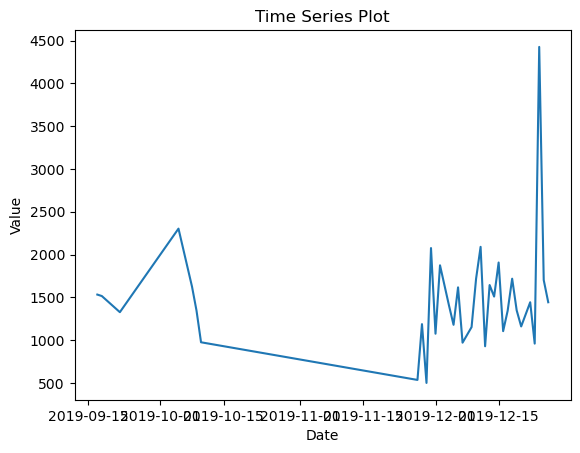

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


subdf1 = df.groupby('created_day')[['created_day','price']].mean('price').reset_index()

# Create the time series plot
sns.lineplot(x='created_day', y='price', data=subdf1)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

plt.show()

## Conclusión
Se descarta la variable time para el modelo por su insignificancia